In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [2]:
cwd = os.getcwd()
df = pd.read_parquet(os.path.join(cwd, 'data', 'shots.parquet'))

Show all the columns

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,match_id,dataset,statsbomb_id,wyscout_id,statsbomb_team_id,wyscout_team_id,team_id,team_name,player_id_statsbomb,player_id_wyscout,player_id,Name,firstName,middleName,lastName,competition_gender,competition_name,competition_type,match_week,competition_part,H_A_column,minute,match_moment,x,y,visible_angle,middle_angle,distance_to_goal,distance_visible_angle,log_distance_to_goal,shot_type_name,shot_one_on_one,shot_open_goal,under_pressure,counter_attack,fast_break,strong_foot,body_part_name,shot_zone,shot_number,shot_zone_number,shot_player_number,shot_zone_player_number,assist_type,pass_end_y,pass_end_x,carry_length,pass_switch,pass_cross,pass_cut_back,pass_height_name,pass_technique_name,smart_pass,area_shot,area_goal,n_angle,goalkeeper_x,goalkeeper_y,players,players_rival,goal
0,2275099,statsbomb,4f985308-bf76-4a5d-860c-93537b4a49e3,NaN,974.0,NaN,174,Reading WFC,10251.0,NaN,2233,Fara Williams,Fara,,Williams,female,FA Women's Super League,League,1.0,start,Away Team,0.124600,0-15,91.3500,42.415,0.389044,0.552452,16.0,6.224710,2.772589,open_play,False,False,False,False,False,False,Left Foot,Zone 3,1.0,1.0,1.0,1.0,pass,39.61,91.9625,3.125344,False,False,False,Ground/ Low Pass,other,None,499.178809,162.431558,1.0,117.4,37.9,11.0,11.0,False
1,7471,statsbomb,7e68fa7c-4e44-4b3a-ab8a-9ff1da69eacc,NaN,766.0,NaN,124,North Carolina Courage,5044.0,NaN,2234,Débora Cristiane de Oliveira,Débora,Cristiane de,Oliveira,female,NWSL,League,15.0,final,Away Team,0.141483,0-15,79.6250,41.650,0.263320,0.292812,26.5,6.977976,3.277145,open_play,False,False,False,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,33.938535,404.432928,2.0,119.0,41.0,11.0,11.0,False
2,19788,statsbomb,bfb97b05-b013-4344-83a7-da6e19b57c05,NaN,966.0,NaN,125,Liverpool WFC,15628.0,NaN,2235,Christie Murray,Christie,,Murray,female,FA Women's Super League,League,14.0,middle,Away Team,0.175250,0-15,78.7500,28.050,0.263923,0.222900,26.9,7.099534,3.292126,open_play,False,False,True,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,pass,30.60,77.0000,3.372571,False,False,False,Ground/ Low Pass,other,None,86.329940,229.008198,2.0,119.0,40.0,11.0,11.0,False
3,7571,statsbomb,25f7433a-e83b-4960-a619-7c991b872952,NaN,787.0,NaN,137,Senegal,5661.0,NaN,29,M'Baye Babacar Niang,M'Baye,Babacar,Niang,male,FIFA World Cup,Cup,3.0,group,Home Team,0.182000,0-15,84.0000,45.900,0.263764,0.515549,24.1,6.356722,3.182212,open_play,False,False,False,False,False,True,Right Foot,Zone 5,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,34.861629,370.600342,1.0,120.0,41.0,11.0,11.0,False
4,266142,statsbomb,aeb61371-c08d-4a3f-ad1c-6ec102a4259e,NaN,213.0,NaN,184,Sevilla,6672.0,NaN,502,Jorge Andújar Moreno,Jorge,Andújar,Moreno,male,La Liga,League,31.0,final,Home Team,0.189983,0-15,90.3875,20.655,0.275611,0.740093,19.8,5.457104,2.985682,open_play,False,False,False,False,False,True,Right Foot,Zone 3,1.0,1.0,1.0,1.0,clearance,NaN,NaN,NaN,None,None,None,None,None,None,1663.719054,51.194807,2.0,118.9,42.5,11.0,11.0,False


Split shot between penalty and non-penalty shots.

In [4]:
df_penalty = df[df.shot_type_name == 'penalty'].copy()
df_non_penalty = df[df.shot_type_name != 'penalty'].copy()
df_penalty = df_penalty[['match_id','dataset','statsbomb_id','wyscout_id','statsbomb_team_id','wyscout_team_id',
                             'team_id','team_name','player_id_statsbomb','player_id_wyscout','player_id','Name','firstName',
                             'middleName','lastName','competition_gender','competition_name','competition_type','match_week',
                             'competition_part','H_A_column','minute','match_moment','shot_number','shot_zone_number',
                             'shot_player_number', 'shot_zone_player_number','players','players_rival','goal']]

Save Data

In [5]:
df_penalty.to_parquet(os.path.join(cwd, 'data', 'penalties.parquet'))
df_non_penalty.to_parquet(os.path.join(cwd, 'data', 'nonpenalties.parquet'))

In [6]:
df_penalty_goals = df_penalty[df_penalty['goal']==True]
df_non_penalty_goals = df_non_penalty[df_non_penalty['goal']==True]

In [7]:
df_non_penaltyv = df_non_penalty[df_non_penalty.distance_to_goal < 40].copy()
# df_non_penaltyv = df_non_penalty[df_non_penalty.distance_to_goal > 1].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
g1=df_non_penaltyv.groupby(['distance_bins']).agg({'match_id':'count'})
g1

,match_id
distance_bins,
3.477521,952
6.837096,6068
10.496876,10628
14.311126,12799
18.254915,9318
22.217547,7990
26.051086,8196
29.881339,5659
33.558092,2107


In [8]:
pt1 = pd.pivot_table(df_non_penaltyv, values='goal', index=['match_moment'],
                    columns=['distance_bins'], aggfunc=np.mean)
pt1 = pt1*100
pt1

distance_bins,3.477521,6.837096,10.496876,14.311126,18.254915,22.217547,26.051086,29.881339,33.558092,37.475057
match_moment,,,,,,,,,,
0-15,57.894737,27.250000,15.495087,11.796733,5.363036,3.564728,2.775025,1.986755,2.464789,0.000000
15-30,54.545455,28.240253,16.541823,11.180773,7.551320,3.918367,2.212052,2.183406,0.518135,0.000000
30-45,53.237410,25.418410,15.002885,10.197869,6.818182,4.647436,3.020914,2.247191,2.339181,1.149425
45-60,62.893082,28.183521,17.112025,12.149533,6.858148,3.739003,3.156481,2.112676,1.652893,1.041667
60-75,60.645161,29.188078,15.638107,13.115530,6.620429,6.315007,3.003663,2.974828,1.973684,1.818182
75-90,51.886792,28.593041,16.390658,12.370779,6.807052,4.824813,2.772964,2.103418,1.401869,0.000000


In [9]:
g=df_non_penaltyv.groupby(['match_moment']).agg({'match_id':'count'})
g

,match_id
match_moment,
0-15,8288
15-30,9885
30-45,10154
45-60,11432
60-75,10439
75-90,13960


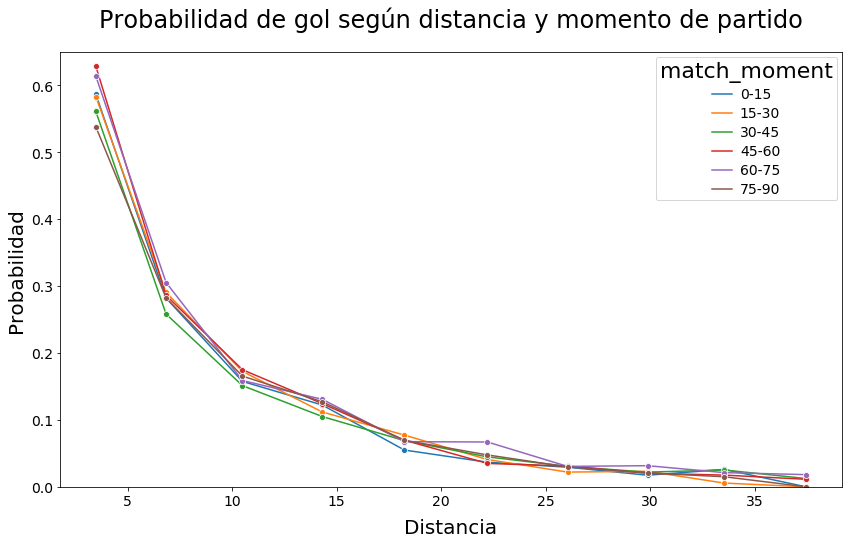

In [51]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator='mean', hue="match_moment", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.65))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según distancia y momento de partido', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

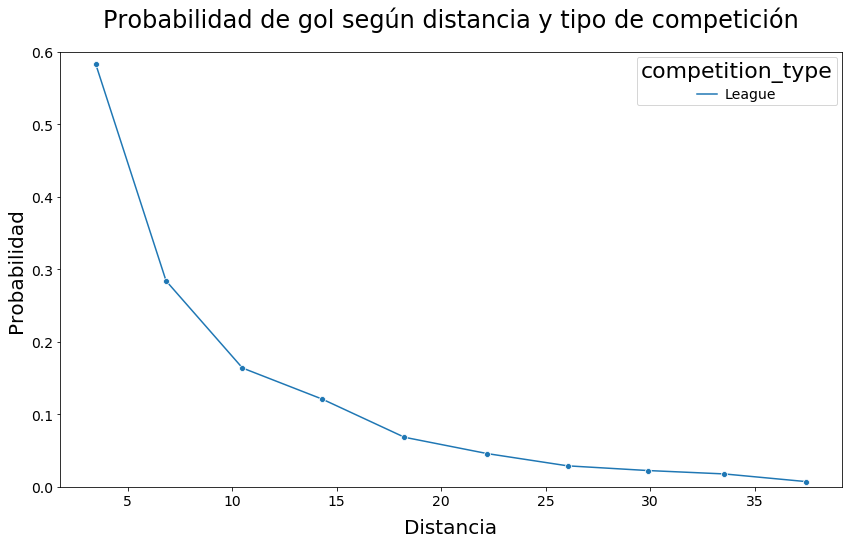

In [50]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator='mean', hue="competition_type", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.6))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según distancia y tipo de competición', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

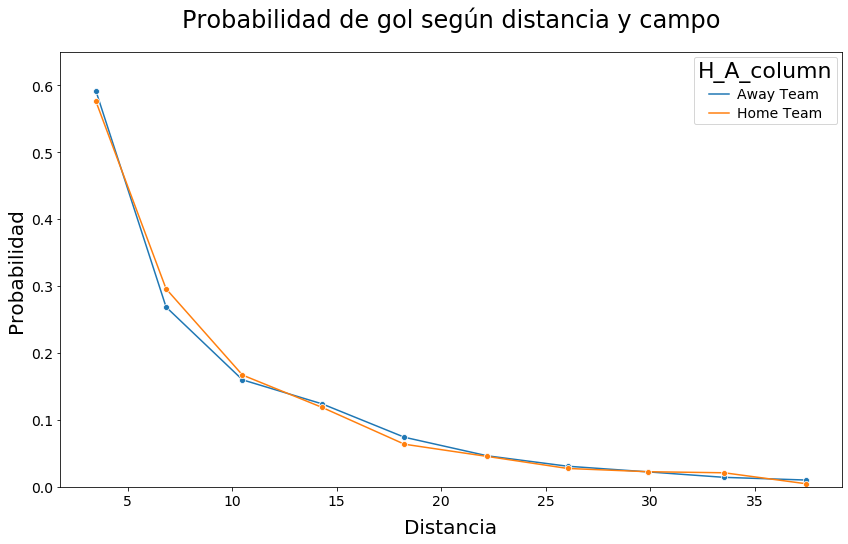

In [49]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator='mean', hue="H_A_column", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.65))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según distancia y campo', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

In [13]:
pt2 = pd.pivot_table(df_non_penaltyv, values='goal', index=['competition_part'],
                    columns=['distance_bins'], aggfunc=np.mean)
pt2 = pt2*100
pt2

distance_bins,3.477521,6.837096,10.496876,14.311126,18.254915,22.217547,26.051086,29.881339,33.558092,37.475057
competition_part,,,,,,,,,,
final,56.630824,28.873612,16.911986,12.018415,7.029635,4.617254,2.556818,1.847437,2.188552,0.000000
group,41.666667,20.147420,12.765957,7.952286,4.694836,4.147465,1.630435,2.419355,0.000000,0.000000
knockout,31.818182,29.496403,11.020408,8.571429,5.555556,4.705882,2.564103,2.654867,0.000000,0.000000
middle,59.800664,29.331942,15.823529,12.131464,6.675523,4.593070,2.801644,2.445961,1.386749,1.449275
start,58.275862,26.880466,16.448836,12.150026,6.804198,4.517454,3.318846,2.416756,1.788171,0.657895


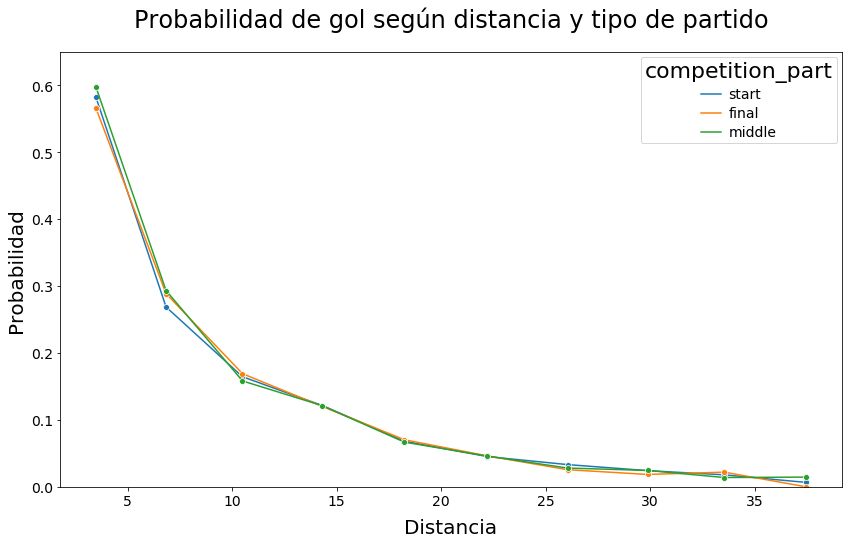

In [48]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part != "group") & 
                                 (df_non_penalty.competition_part != "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator='mean', hue="competition_part", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.65))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según distancia y tipo de partido', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

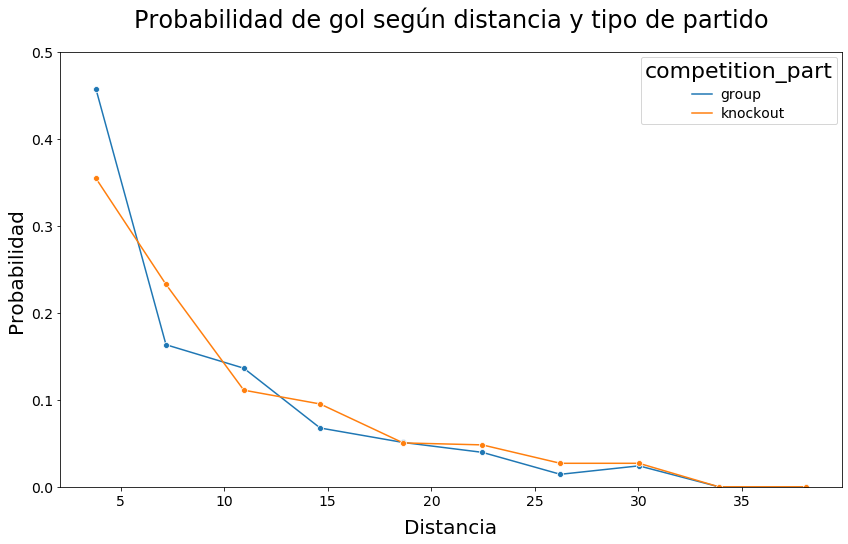

In [47]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part == "group") | 
                                 (df_non_penalty.competition_part == "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator='mean', hue="competition_part", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.5))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según distancia y tipo de partido', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

In [16]:
df_non_penaltyv = df_non_penalty[df_non_penalty.visible_angle < 1].copy()
# df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle > 0.03].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi
g2=df_non_penaltyv.groupby(['angle_bins']).agg({'match_id':'count'})
g2

,match_id
angle_bins,
4.272199,174
9.883911,3761
14.379149,22470
19.717921,13261
25.657954,7770
31.275334,5468
36.978571,3657
42.548006,2226
48.142223,1805


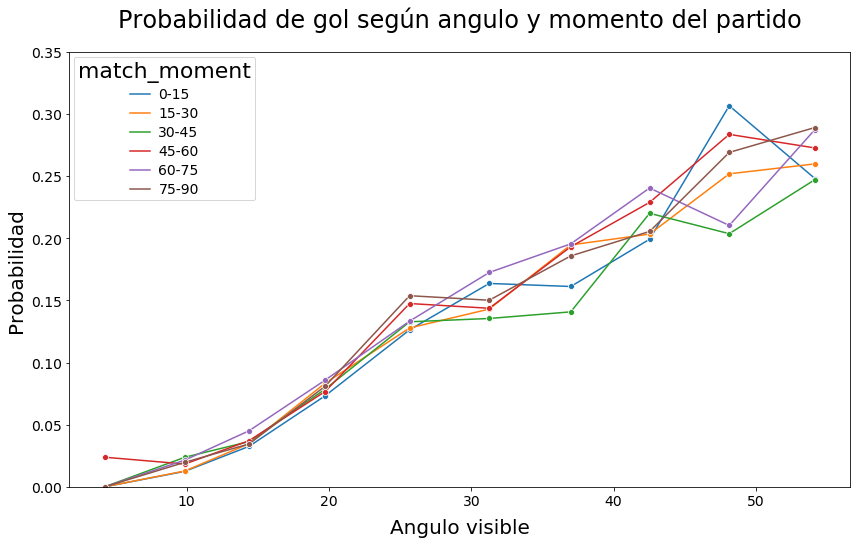

In [46]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator='mean', hue="match_moment", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.35))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según angulo y momento del partido', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

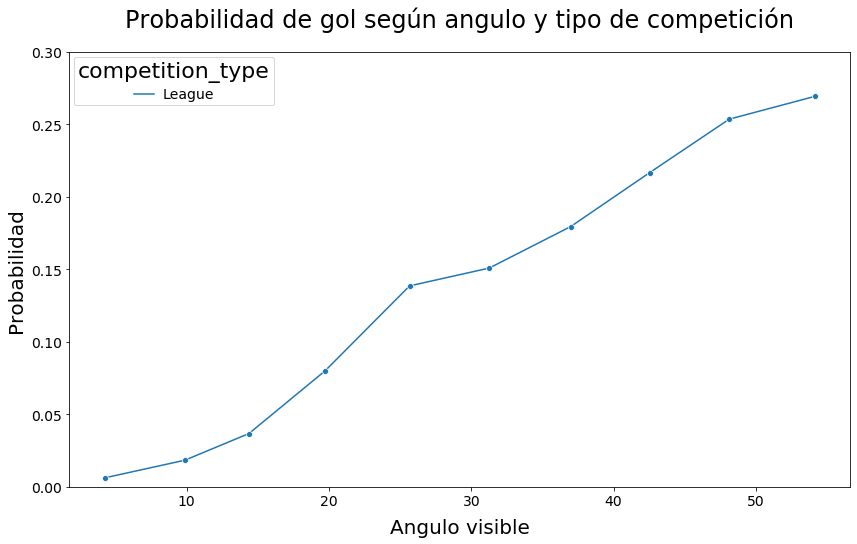

In [45]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator='mean', hue="competition_type", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.3))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según angulo y tipo de competición', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

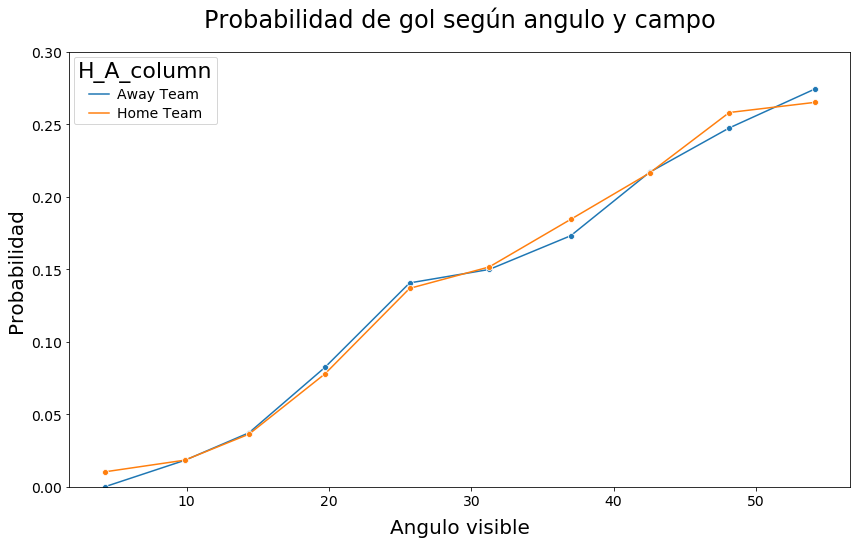

In [44]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator='mean', hue="H_A_column", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.3))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según angulo y campo', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

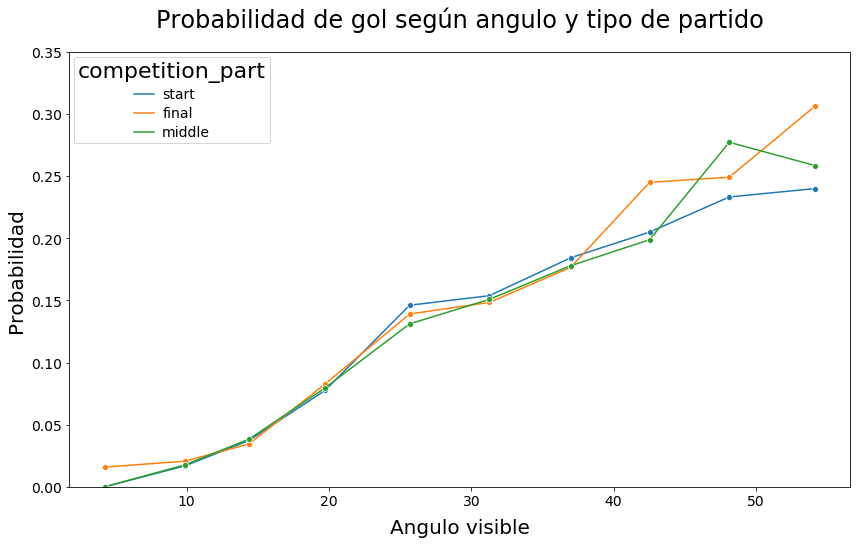

In [43]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part != "group") & 
                                 (df_non_penalty.competition_part != "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi

fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator='mean', hue="competition_part", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.35))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según angulo y tipo de partido', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

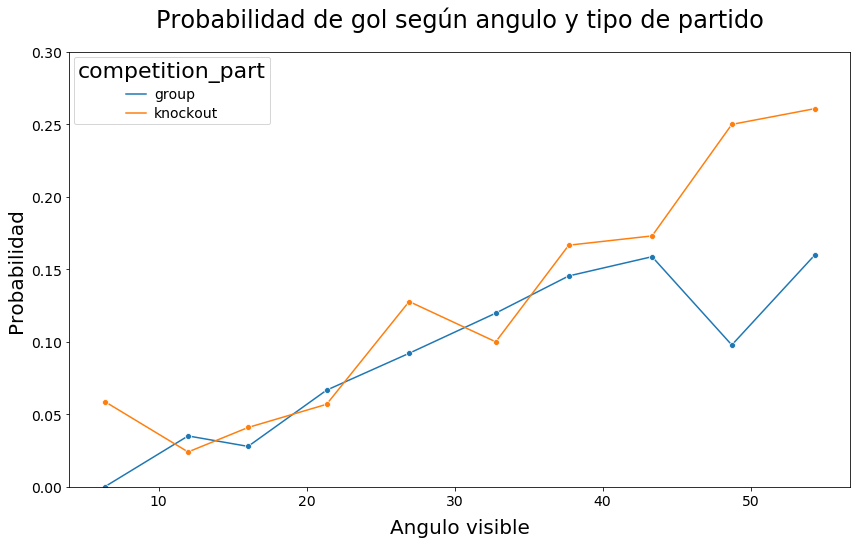

In [42]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part == "group") |
                                 (df_non_penalty.competition_part == "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi

fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator='mean', hue="competition_part", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.3))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según angulo y tipo de partido', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

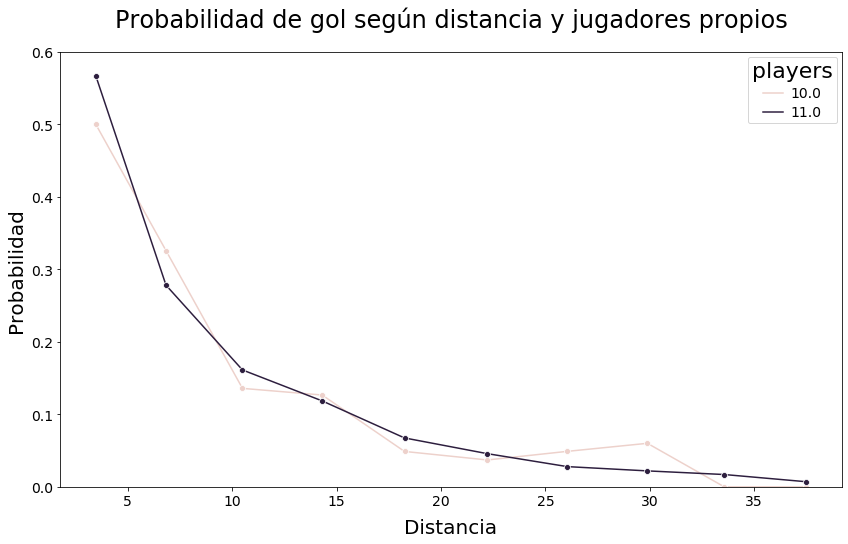

In [41]:
df_non_penaltyv = df_non_penalty[df_non_penalty.players > 9].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator='mean', hue="players", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.6))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según distancia y jugadores propios', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

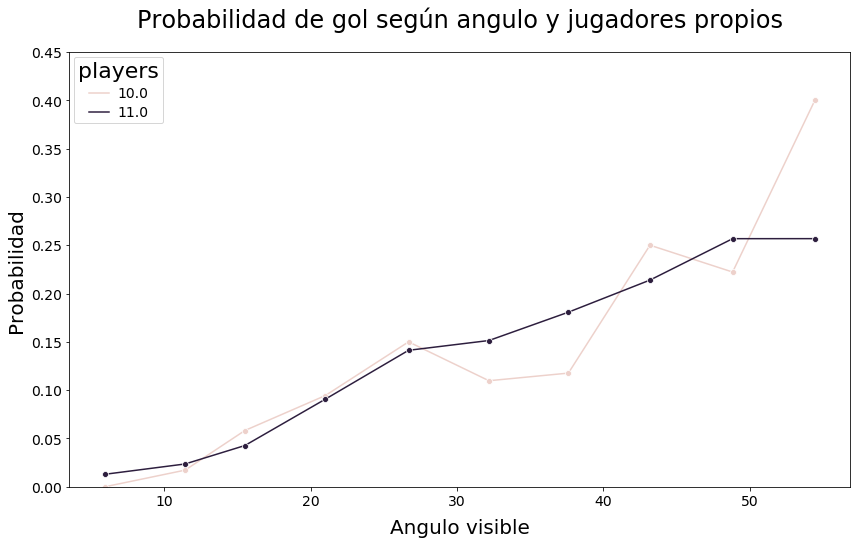

In [40]:
df_non_penaltyv = df_non_penalty[df_non_penalty.players > 9].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle > 0.03].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator='mean', hue="players", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.45))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según angulo y jugadores propios', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

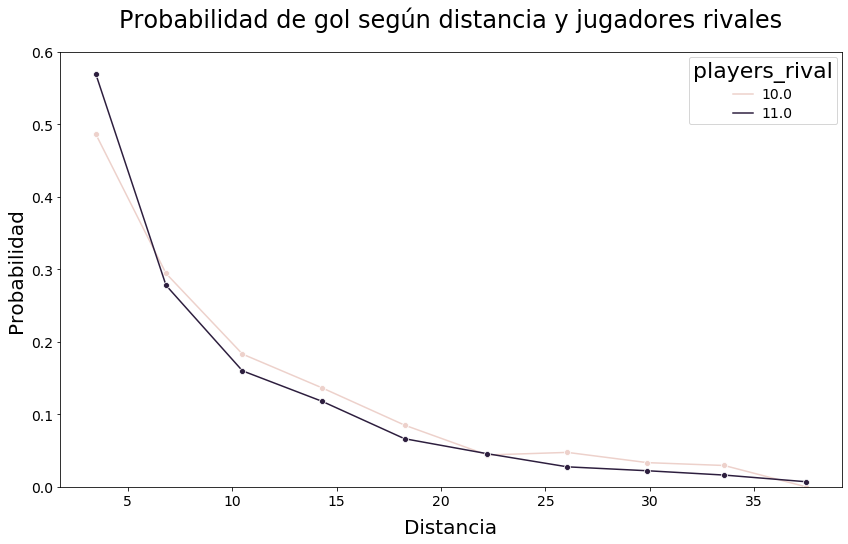

In [39]:
df_non_penaltyv = df_non_penalty[df_non_penalty.players_rival > 9].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator='mean', hue="players_rival", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.6))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según distancia y jugadores rivales', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

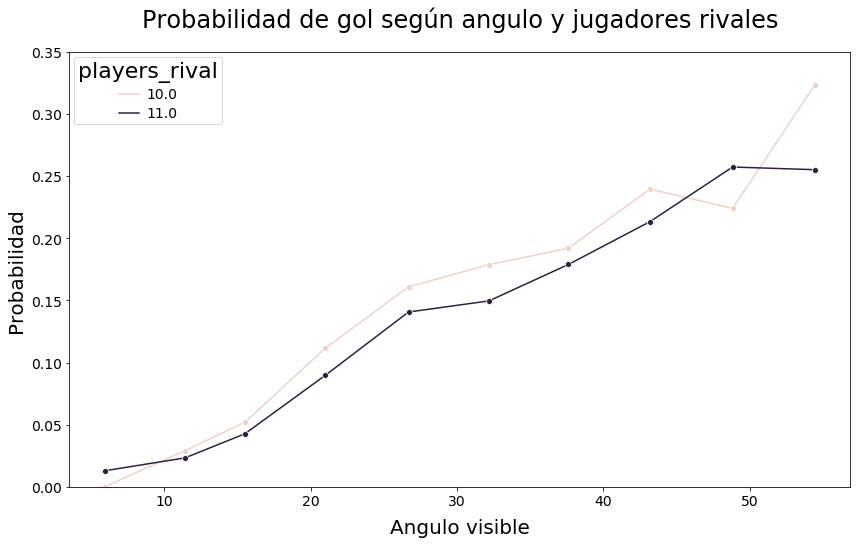

In [38]:
df_non_penaltyv = df_non_penalty[df_non_penalty.players_rival > 9].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle > 0.03].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator='mean', hue="players_rival", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 0.35))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol según angulo y jugadores rivales', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

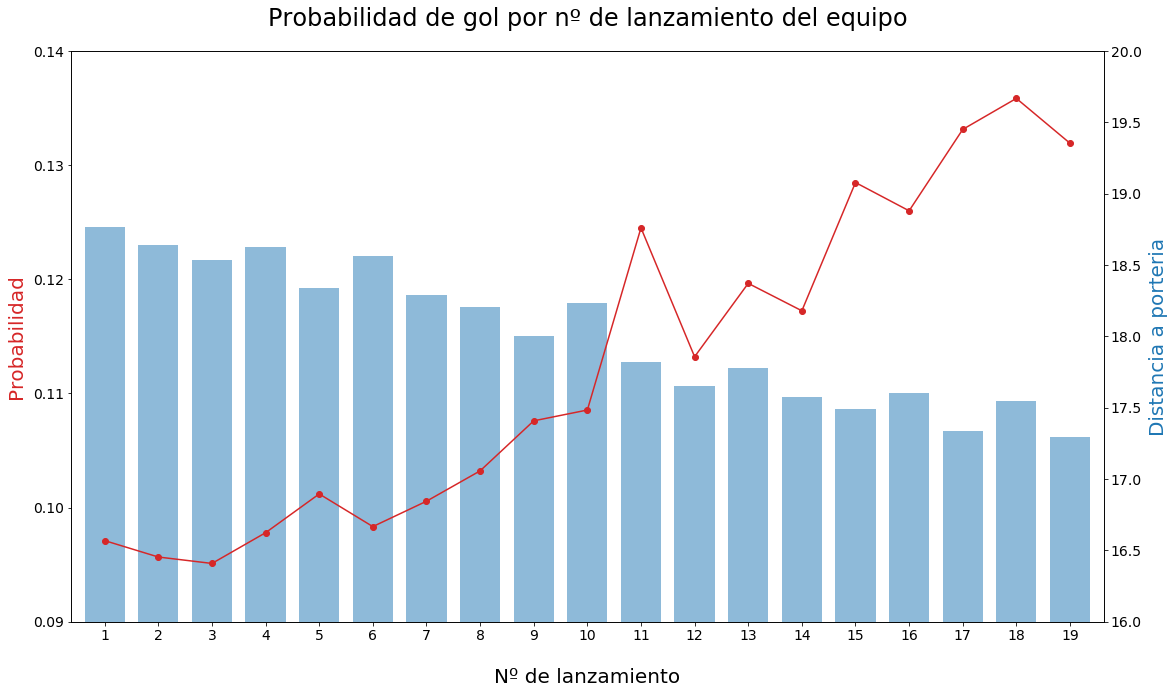

In [26]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_number < 20].copy()
g = df_non_penaltyv.groupby('shot_number')[['goal','distance_to_goal']].mean()
g.reset_index()
g['shot_number'] = ("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19")
color = 'tab:blue'
ax = g.plot.bar(x="shot_number", y="distance_to_goal", legend=False,  color = color, alpha=0.5, width = 0.75)
color = 'tab:red'
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=45, color = color)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=25)
ax.set_title('Probabilidad de gol por nº de lanzamiento del equipo', fontsize=24, pad = 25)
ax2 = ax.twinx()
ax.set(ylim=(16, 20))
ax2.set(ylim=(0.09, 0.14))
g.plot(x="shot_number", y="goal", legend=False, marker='o', ax=ax2, color = color)
color = 'tab:blue'
ax2.set_ylabel('Distancia a porteria', fontsize=20, labelpad=45, color = color)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(labelrotation=0)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

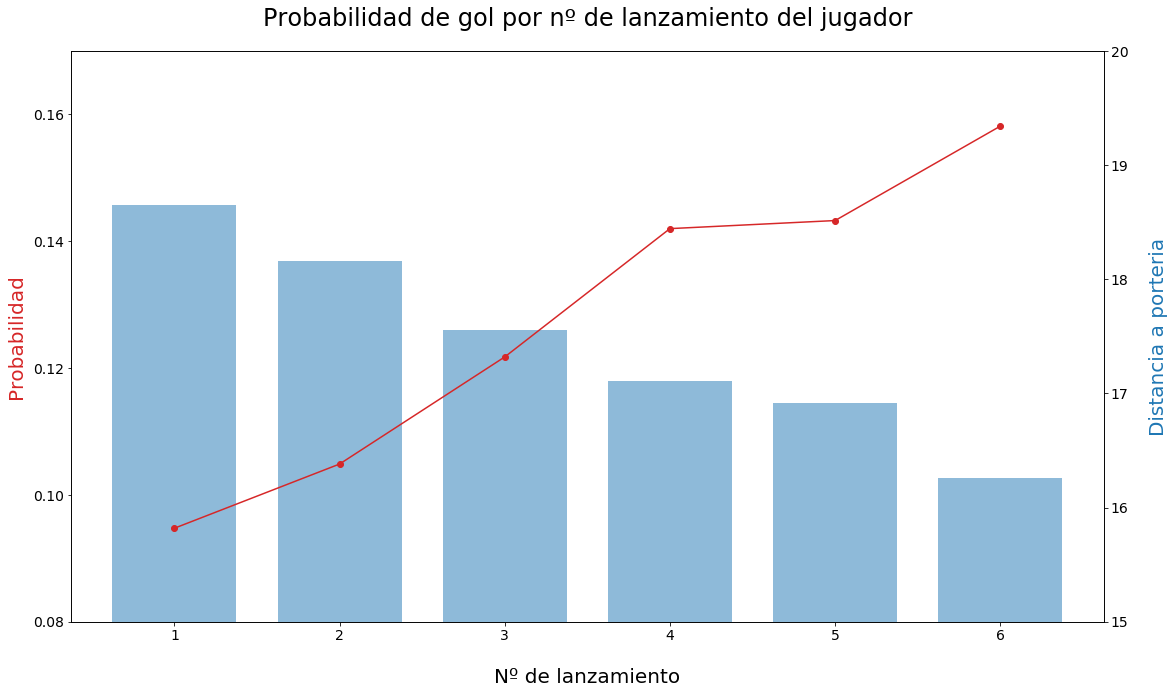

In [27]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_player_number < 7].copy()
g = df_non_penaltyv.groupby('shot_player_number')[['goal','distance_to_goal']].mean()
g.reset_index()
g['shot_player_number'] = ("1","2","3","4","5","6")
color = 'tab:blue'
ax = g.plot.bar(x="shot_player_number", y="distance_to_goal", legend=False,  color = color, alpha=0.5, width = 0.75)
color = 'tab:red'
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=45, color = color)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=25)
ax.set_title('Probabilidad de gol por nº de lanzamiento del jugador', fontsize=24, pad=25)
ax2 = ax.twinx()
ax.set(ylim=(15, 20))
ax2.set(ylim=(0.08, 0.17))
g.plot(x="shot_player_number", y="goal", legend=False, marker='o', ax=ax2, color = color)
color = 'tab:blue'
ax2.set_ylabel('Distancia a porteria', fontsize=20, labelpad=45, color = color)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(labelrotation=0)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

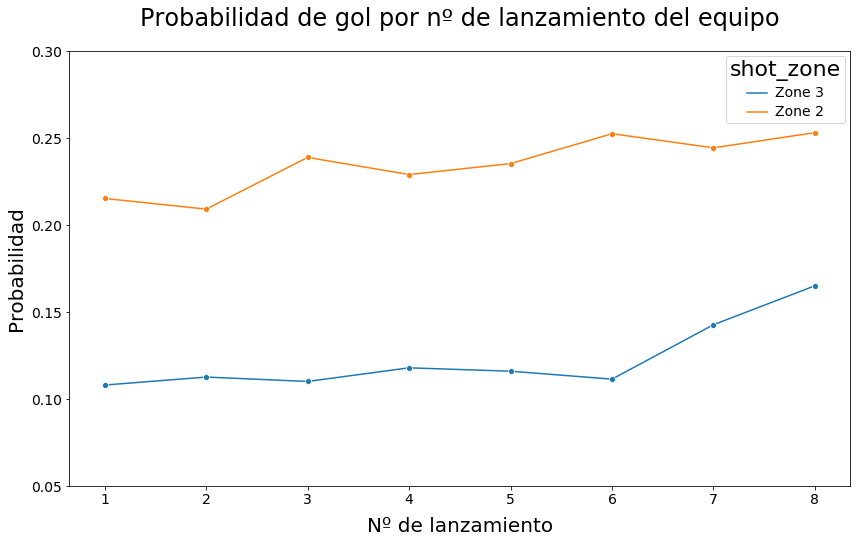

In [36]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_zone_number < 9].copy()
df_non_penaltyv = df_non_penaltyv[(df_non_penaltyv.shot_zone == "Zone 2") | (df_non_penaltyv.shot_zone == "Zone 3")].copy()
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="shot_zone_number", y="goal",  hue="shot_zone",data=df_non_penaltyv, estimator='mean', ci=None, marker='o')
ax.set(ylim=(0.05, 0.3))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol por nº de lanzamiento del equipo', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

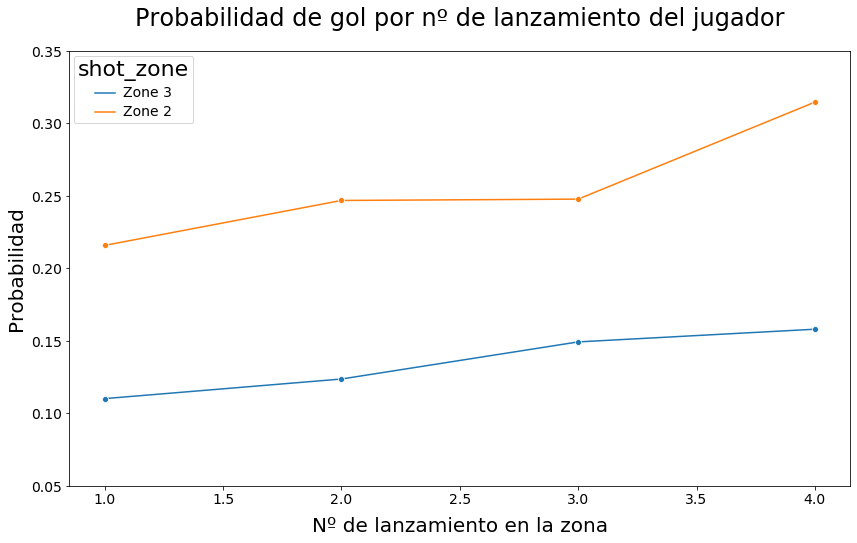

In [35]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_zone_player_number < 5].copy()
df_non_penaltyv = df_non_penaltyv[(df_non_penaltyv.shot_zone == "Zone 2") | (df_non_penaltyv.shot_zone == "Zone 3")].copy()
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="shot_zone_player_number", y="goal", estimator='mean', hue="shot_zone", data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.05, 0.35))
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
ax.set_ylabel('Probabilidad', fontsize=20, labelpad=5)
ax.set_xlabel('Nº de lanzamiento en la zona', fontsize=20, labelpad=10)
ax.set_title('Probabilidad de gol por nº de lanzamiento del jugador', fontsize=24, pad = 25)
ax.tick_params(axis='both', which='major', labelsize=14)

# FALTA ANALIZAR PENALTIS!